In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import spearmanr, linregress, pearsonr, rankdata
import matplotlib.pyplot as plt
import seaborn as sns
from predict_comb_therapy_effect import *

In [2]:
df1 = import_survival_data('../data/Peters2017/PFS_1L_Atezo_TC23.csv')
df2 = import_survival_data('../data/Peters2017/PFS_2L_Atezo_TC23.csv')
df3 = import_survival_data('../data/Peters2017/PFS_3L_Atezo_TC23.csv')

In [3]:
f1 = interpolate(df1)
f2 = interpolate(df2)
f3 = interpolate(df3)

In [14]:
N = 5000
timepoints = np.flip(np.linspace(0, min(df2['Time'].max(), df3['Time'].max()), num=N))

In [20]:
f3_data = f3(timepoints)
f3_data[-25:] = 100

In [21]:
df23 = pd.DataFrame({'Time': timepoints, 'Survival': 0.75 * f2(timepoints) + 0.25 * f3_data})

In [22]:
df23.to_csv('../data/Peters2017/PFS_2L_75_3L_25_Atezo_TC23.csv', index=False)

In [23]:
phase3 = import_survival_data('../data/NSCLC/NSNSCLC_atezo_Rittmeyer2017_TC23.csv')

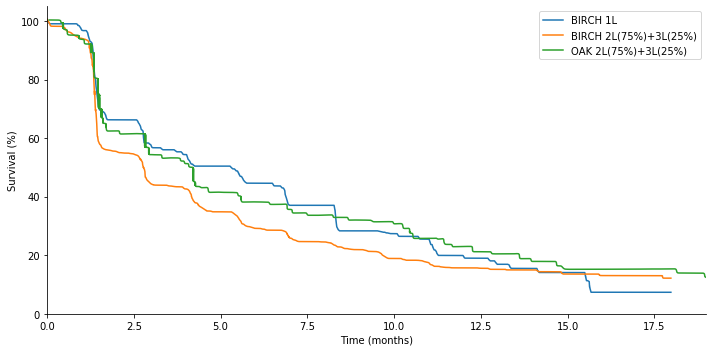

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.despine()
sns.lineplot(x='Time', y='Survival', data=df1,
             label="BIRCH 1L", ax=ax)
#sns.lineplot(x='Time', y='Survival', data=df2,
#             label="BIRCH 2L", ax=ax)
#sns.lineplot(x='Time', y='Survival', data=df3,
#             label="BIRCH 3L", ax=ax)
sns.lineplot(x='Time', y='Survival', data=df23,
             label="BIRCH 2L(75%)+3L(25%)", ax=ax)
sns.lineplot(x='Time', y='Survival', data=phase3,
             label="OAK 2L(75%)+3L(25%)", ax=ax)
ax.set_ylim(0, 105)
ax.set_xlim(0, max([df1['Time'].max(), df2['Time'].max(), df3['Time'].max()]) + 1)
ax.set_xlabel("Time (months)")
ax.set_ylabel('Survival (%)')
fig.tight_layout()
fig.savefig('../data/Peters2017/PFS_123L_Atezo_TC23_v3_withOAK.pdf')

4166


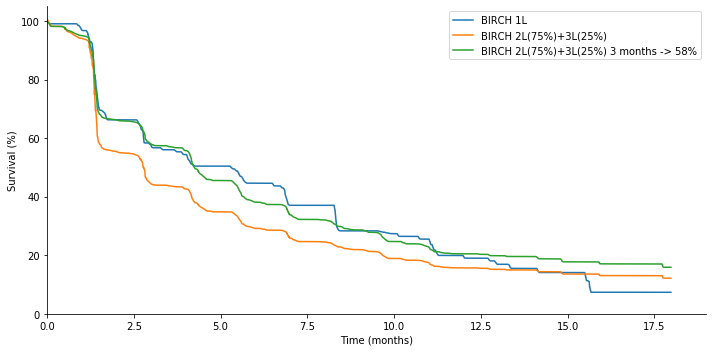

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.despine()
sns.lineplot(x='Time', y='Survival', data=df1,
             label="BIRCH 1L", ax=ax)
sns.lineplot(x='Time', y='Survival', data=df23,
             label="BIRCH 2L(75%)+3L(25%)", ax=ax)
sns.lineplot(x='Time', y='Survival', data=adjust_response(df23, 3, 58),
             label="BIRCH 2L(75%)+3L(25%) 3 months -> 58%", ax=ax)
ax.set_ylim(0, 105)
ax.set_xlim(0, max([df1['Time'].max(), df2['Time'].max(), df3['Time'].max()]) + 1)
ax.set_xlabel("Time (months)")
ax.set_ylabel('Survival (%)')
fig.tight_layout()
fig.savefig('../data/Peters2017/PFS_123L_Atezo_TC23_v3_adjusted.pdf')

In [37]:
cutoff_idx = atezo[atezo['Time'] < 3]['Survival'].idxmin()

In [35]:
atezo = import_survival_data('../data/NSCLC/NSNSCLC_atezo_Rittmeyer2017.csv')

In [38]:
atezo.loc[cutoff_idx, :]

Time         2.997107
Survival    45.441356
Name: 1638, dtype: float64

In [36]:
atezo

,Time,Survival
0,24.980215,8.687671
1,24.958591,8.662698
2,24.941816,8.656525
3,24.931752,8.656587
4,24.920570,8.656655
...,...,...
2132,0.183498,99.997271
2133,0.168934,100.008334
2134,0.156157,100.019026
2135,0.121560,100.035010
